### Color Identification in Images
     ● Implement an image color detector which identifies all the colors in an
       image or video.

#### Author: Thilagavathy R Vasantharaja

#### 1.Importing Libraries

In [39]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
import cv2
from collections import Counter
from skimage.color import rgb2lab, deltaE_cie76
import os

%matplotlib inline

#### 2.Reading image and working with Open CV

The type of this input is <class 'numpy.ndarray'>
Shape: (177, 284, 3)


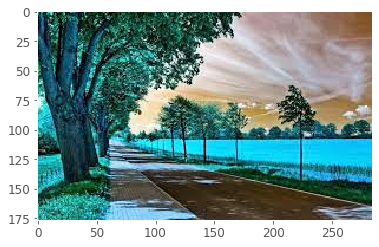

In [40]:
image = cv2.imread('Sample_image.jpg')
print("The type of this input is {}".format(type(image)))
print("Shape: {}".format(image.shape))
plt.imshow(image)

## Output
# The type of this input is <class 'numpy.ndarray'>
# Shape: (3456, 4608, 3)

#### 3.To view the actual image we need to convert the rendering to Red Green Blue (RGB)

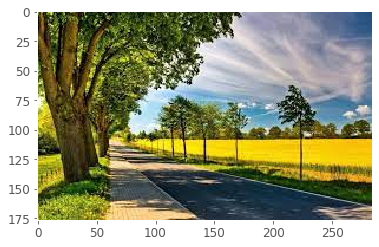

In [41]:
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)

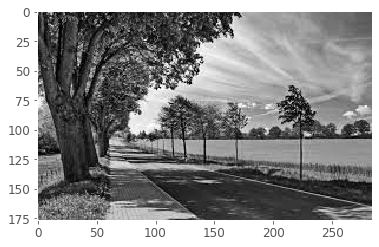

In [42]:

gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt.imshow(gray_image, cmap='gray')

#### 4.Color Identification

In [43]:
def RGB2HEX(color):
    return "#{:02x}{:02x}{:02x}".format(int(color[0]), int(color[1]), int(color[2]))

#### 5.Read image in RGB color space

In [44]:
def get_image(image_path):
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    return image

#### 6.Get colors from an image

In [73]:
def get_colors(image,number_of_colors,show_chart):
    modified_image = cv2.resize(image, (600, 400), interpolation = cv2.INTER_AREA)
    modified_image = modified_image.reshape(modified_image.shape[0]*modified_image.shape[1], 3)
    clf = KMeans(n_clusters = number_of_colors)
    labels = clf.fit_predict(modified_image)
    
    counts = Counter(labels)

    center_colors = clf.cluster_centers_
    # We get ordered colors by iterating through the keys
    ordered_colors = [center_colors[i] for i in counts.keys()]
    hex_colors = [RGB2HEX(ordered_colors[i]) for i in counts.keys()]
    rgb_colors = [ordered_colors[i] for i in counts.keys()]

    if (show_chart):
        plt.figure(figsize = (8, 6))
        plt.pie(counts.values(), labels = hex_colors, colors = hex_colors)

    return rgb_colors

[array([35.01645065, 52.8277667 , 63.87437687]),
 array([ 97.68949103, 119.82026469, 136.80368259]),
 array([146.73494505, 143.81538462,  51.44615385]),
 array([160.23807162, 165.24681562, 172.66519628]),
 array([88.01984171, 87.76602471, 34.4856624 ]),
 array([235.60885684, 204.01625108,  27.66202834]),
 array([211.60923652, 211.22981543, 202.76221644]),
 array([38.48867256, 44.58227536, 10.86059396])]

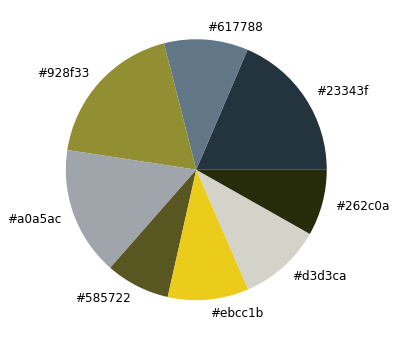

In [77]:
get_colors(get_image('Sample_image.jpg'),8,True)

#### 7.Search Images using color
      Get all images

In [98]:
IMAGE_DIRECTORY = 'Test_images'
COLORS = {
    'GREEN': [0, 128, 0],
    'BLUE': [0, 0, 128],
    'YELLOW': [255, 255, 0]
}
images = []

for file in os.listdir(IMAGE_DIRECTORY):
    if not file.startswith('.'):
        images.append(get_image(os.path.join(IMAGE_DIRECTORY, file)))

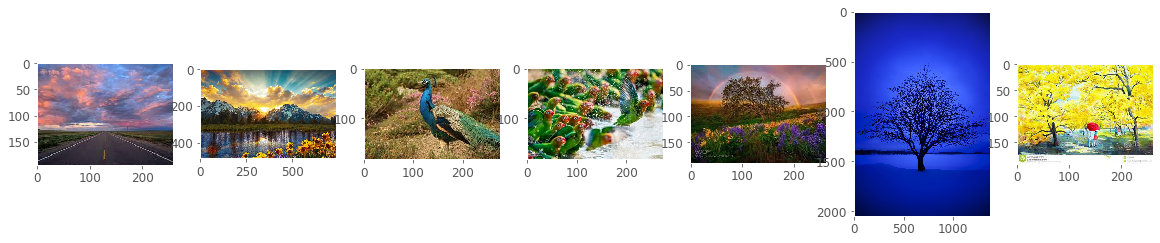

In [99]:
plt.figure(figsize=(20, 10))
for i in range(len(images)):
    plt.subplot(1, len(images), i+1)
    plt.imshow(images[i])

#### 8.Match Images with color

In [100]:

def match_image_by_color(image, color, threshold = 60, number_of_colors = 10): 
    
    image_colors = get_colors(image, number_of_colors, False)
    selected_color = rgb2lab(np.uint8(np.asarray([[color]])))

    select_image = False
    for i in range(number_of_colors):
        curr_color = rgb2lab(np.uint8(np.asarray([[image_colors[i]]])))
        diff = deltaE_cie76(selected_color, curr_color)
        if (diff < threshold):
            select_image = True
    
    return select_image

In [101]:
def show_selected_images(images, color, threshold, colors_to_match):
    index = 1
    
    for i in range(len(images)):
        selected = match_image_by_color(images[i],
                                        color,
                                        threshold,
                                        colors_to_match)
        if (selected):
            plt.subplot(1, 5, index)
            plt.imshow(images[i])
            index += 1

#### 9.Filter Results

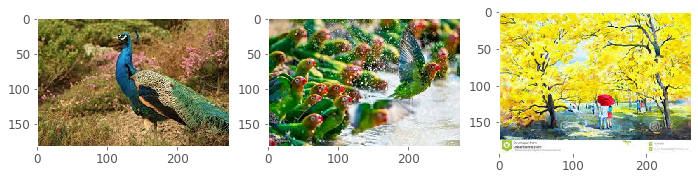

In [102]:
# Variable 'selected_color' can be any of COLORS['GREEN'], COLORS['BLUE'] or COLORS['YELLOW']
plt.figure(figsize = (20, 10))
show_selected_images(images,COLORS['GREEN'], 60, 5)

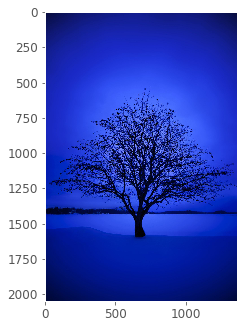

In [103]:
plt.figure(figsize = (20, 10))
show_selected_images(images,COLORS['BLUE'], 60, 5)

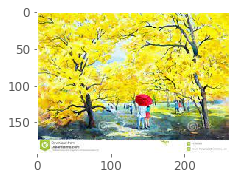

In [104]:
plt.figure(figsize = (20, 10))
show_selected_images(images,COLORS['YELLOW'], 60, 5)

### THANK YOU!!!!